# Load the Data

In [1]:
import pandas as pd
import zipfile
import os

# Function to load CSV from a ZIP file with multiple files
def load_csv_from_zip(zip_path, csv_filename):
    with zipfile.ZipFile(zip_path, 'r') as z:
        # Extract and read the specific CSV file
        with z.open(csv_filename) as f:
            return pd.read_csv(f)

# Define the relative path to the datasets folder
datasets_path = os.path.join('..', 'Datasets')

# Load datasets from zipped CSV files-Great Britain & United States
df_gb = load_csv_from_zip(os.path.join(datasets_path, 'GBvideos.csv.zip'), 'GBvideos.csv')
df_us = load_csv_from_zip(os.path.join(datasets_path, 'USvideos.csv.zip'), 'USvideos.csv')


# Merge files into 1
merged_df = pd.concat([df_gb, df_us], ignore_index=True)

# Check the first few rows of the merged DataFrame
print(merged_df.head())

      video_id trending_date  \
0  Jw1Y-zhQURU      17.14.11   
1  3s1rvMFUweQ      17.14.11   
2  n1WpP7iowLc      17.14.11   
3  PUTEiSjKwJU      17.14.11   
4  rHwDegptbI4      17.14.11   

                                               title  \
0      John Lewis Christmas Ad 2017 - #MozTheMonster   
1          Taylor Swift: …Ready for It? (Live) - SNL   
2         Eminem - Walk On Water (Audio) ft. Beyoncé   
3  Goals from Salford City vs Class of 92 and Fri...   
4  Dashcam captures truck's near miss with child ...   

                channel_title  category_id              publish_time  \
0                  John Lewis           26  2017-11-10T07:38:29.000Z   
1         Saturday Night Live           24  2017-11-12T06:24:44.000Z   
2                  EminemVEVO           10  2017-11-10T17:00:03.000Z   
3  Salford City Football Club           17  2017-11-13T02:30:38.000Z   
4            Cute Girl Videos           25  2017-11-13T01:45:13.000Z   

                                     

# Check Missing Values

In [2]:
# Check for missing values in the merged DataFrame
print("Missing values")
print(merged_df.isnull().sum())

Missing values
video_id                     0
trending_date                0
title                        0
channel_title                0
category_id                  0
publish_time                 0
tags                         0
views                        0
likes                        0
dislikes                     0
comment_count                0
thumbnail_link               0
comments_disabled            0
ratings_disabled             0
video_error_or_removed       0
description               1182
dtype: int64


In [3]:
df = merged_df.dropna()

In [4]:
# Check for missing values in the merged DataFrame
print("Missing values")
print(df.isnull().sum())

Missing values
video_id                  0
trending_date             0
title                     0
channel_title             0
category_id               0
publish_time              0
tags                      0
views                     0
likes                     0
dislikes                  0
comment_count             0
thumbnail_link            0
comments_disabled         0
ratings_disabled          0
video_error_or_removed    0
description               0
dtype: int64


# Exploratory Data Analysis (EDA)

## Scatter Plot of Numerical Variables

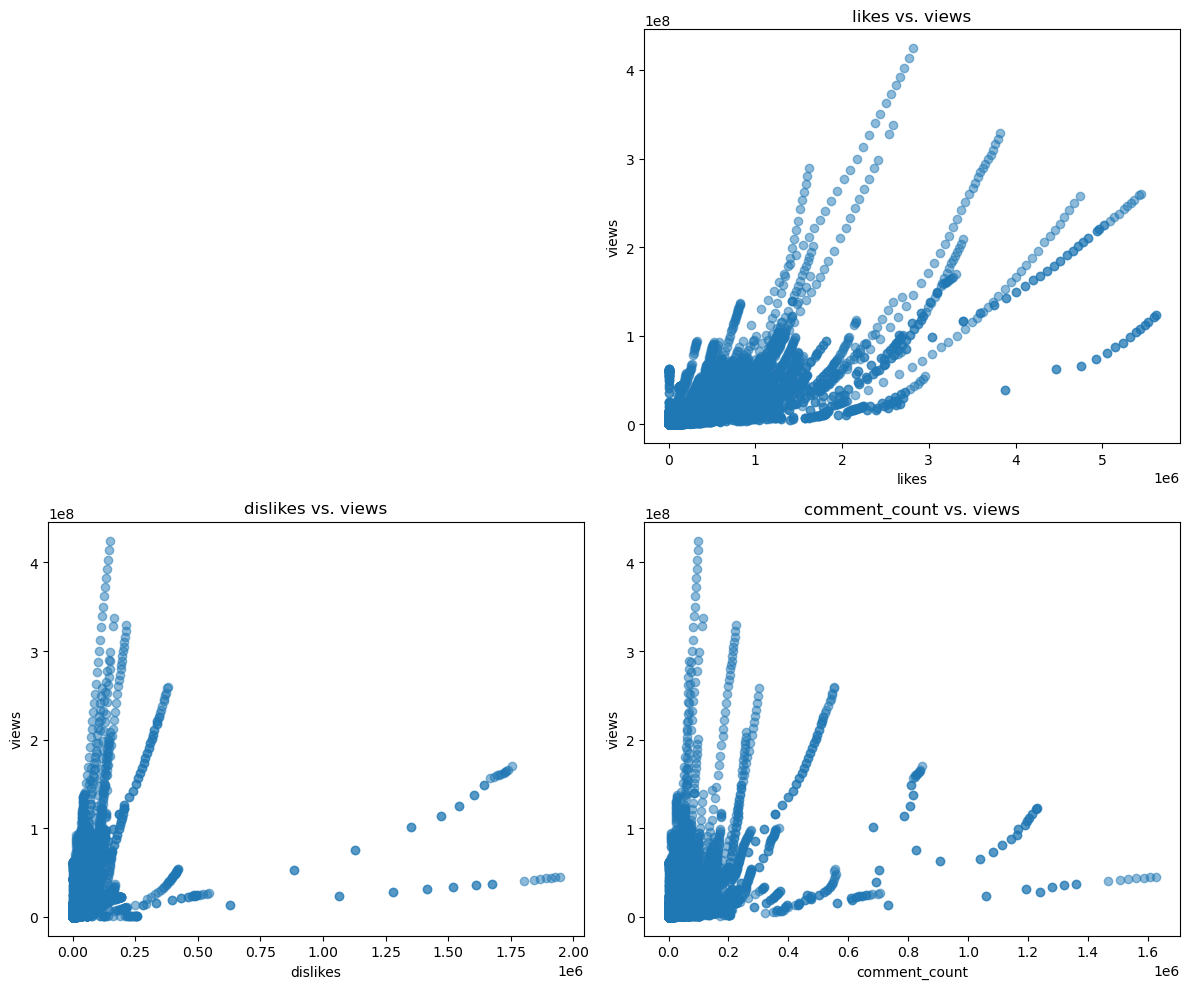

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define numerical columns
numerical_columns = ['views', 'likes', 'dislikes', 'comment_count']


# Scatter plots for each numerical column vs. 'views'
plt.figure(figsize=(12, 10))
for i, column in enumerate(numerical_columns, 1):
    if column != 'views':
        plt.subplot(2, 2, i)
        plt.scatter(merged_df[column], merged_df['views'], alpha=0.5)
        plt.title(f'{column} vs. views')
        plt.xlabel(column)
        plt.ylabel('views')

plt.tight_layout()
plt.show()

## EDA for Numerical Variables

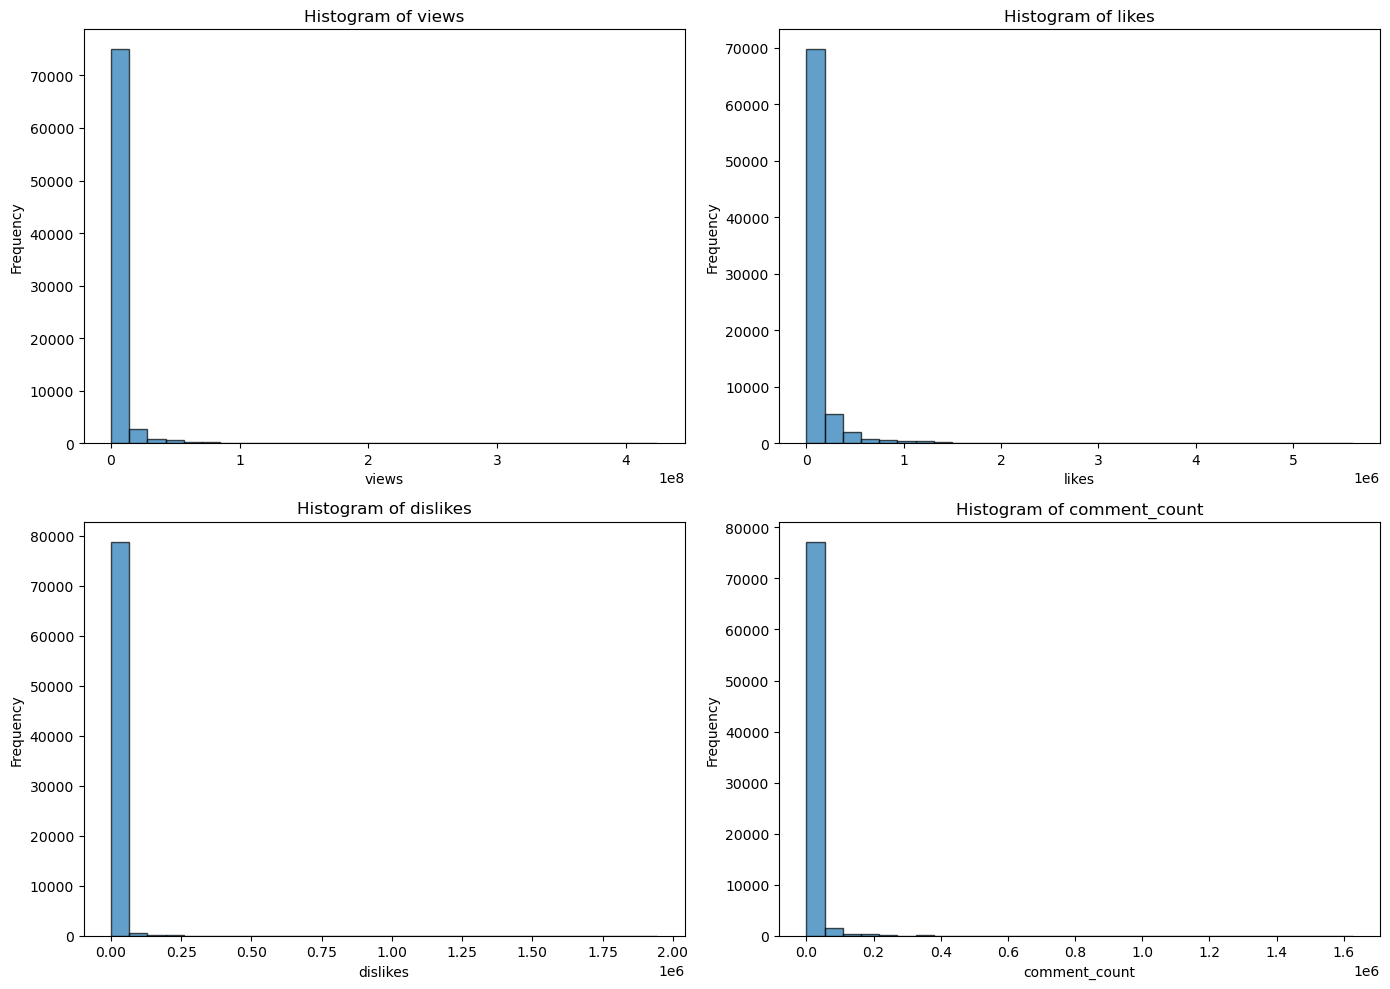

In [6]:
#data exploration for numerical columns
import matplotlib.pyplot as plt

# Define numerical columns
numerical_columns = ['views', 'likes', 'dislikes', 'comment_count']

# Create histograms for each numerical column
plt.figure(figsize=(14, 10))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 2, i)
    plt.hist(merged_df[column], bins=30, alpha=0.7, edgecolor='black')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

## EDA for Date-Time Variables

/var/folders/yn/hnpfh1r15tq8t0xq_j4_rzmh0000gn/T/ipykernel_11260/455230003.py:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(merged_df['trending_day_of_week'], discrete=True, palette='viridis')


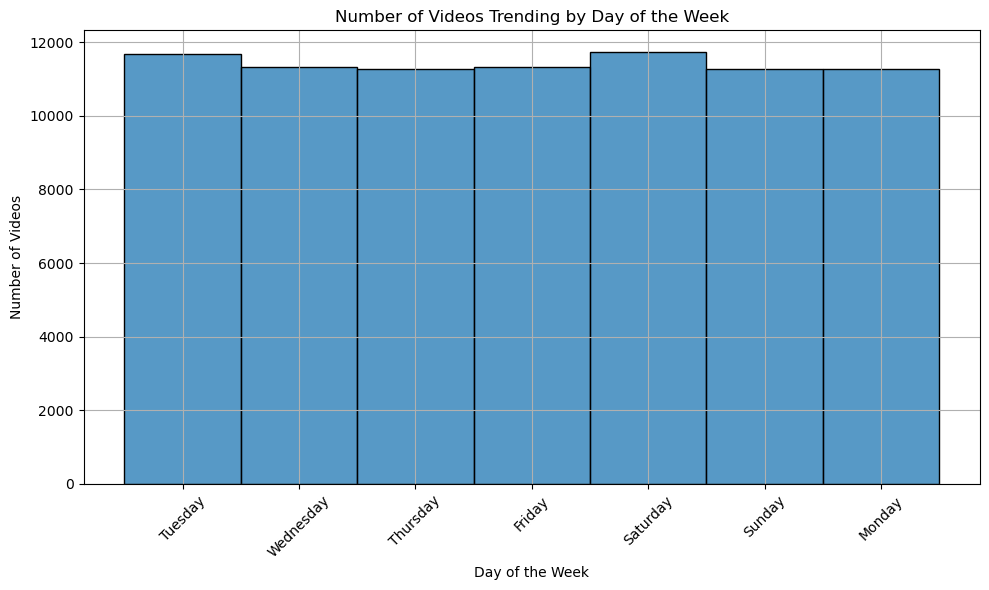

In [8]:
# convert the trending_date to datetime type
merged_df['trending_date'] = pd.to_datetime(merged_df['trending_date'], format='%y.%d.%m')
# Extract day of the week from 'trending_date'
merged_df['trending_day_of_week'] = merged_df['trending_date'].dt.day_name()

# Plot histogram of trending day of the week
plt.figure(figsize=(10, 6))
sns.histplot(merged_df['trending_day_of_week'], discrete=True, palette='viridis')
plt.title('Number of Videos Trending by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Videos')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

/var/folders/yn/hnpfh1r15tq8t0xq_j4_rzmh0000gn/T/ipykernel_11260/1346077495.py:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(merged_df['day_of_week'], discrete=True, palette='viridis')


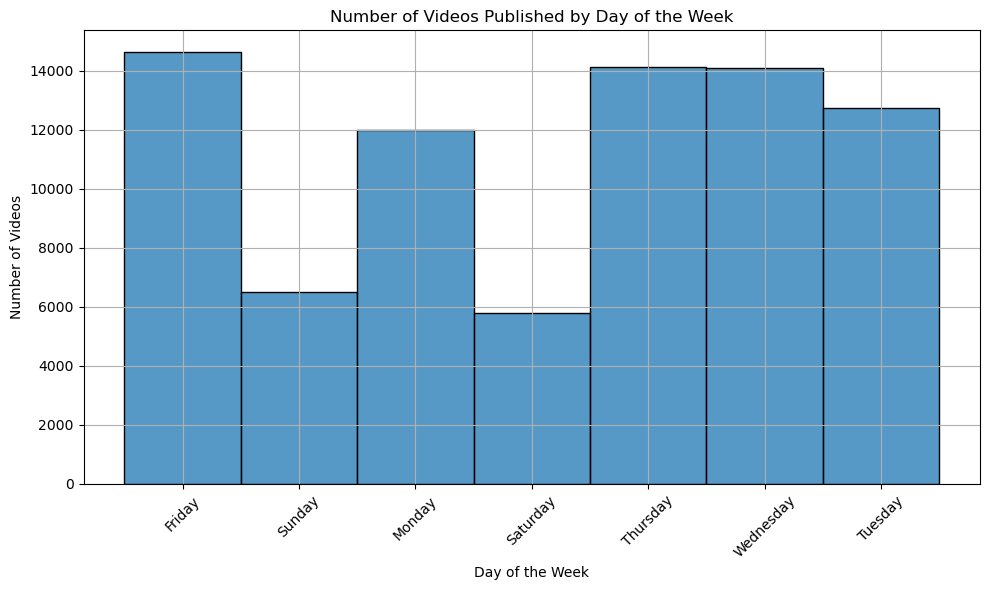

In [9]:
#convert the publish_date to datetime type
merged_df['publish_time'] = pd.to_datetime(merged_df['publish_time'], format='%Y-%m-%dT%H:%M:%S.%fZ')
# Extract day of the week from 'publish_time'
merged_df['day_of_week'] = merged_df['publish_time'].dt.day_name()

# Plot histogram of day of the week
plt.figure(figsize=(10, 6))
sns.histplot(merged_df['day_of_week'], discrete=True, palette='viridis')
plt.title('Number of Videos Published by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Videos')
plt.xticks(rotation=45) 
plt.grid(True)
plt.tight_layout()
plt.show()

## Statistical Description

In [10]:
numerical_description = merged_df.describe()
print(numerical_description)

                       trending_date   category_id  \
count                          79865  79865.000000   
mean   2018-02-25 07:57:45.132410880     18.440205   
min              2017-11-14 00:00:00      1.000000   
25%              2018-01-02 00:00:00     10.000000   
50%              2018-02-23 00:00:00     22.000000   
75%              2018-04-21 00:00:00     24.000000   
max              2018-06-14 00:00:00     43.000000   
std                              NaN      7.818304   

                        publish_time         views         likes  \
count                          79865  7.986500e+04  7.986500e+04   
mean   2018-01-30 08:51:14.599436544  4.091166e+06  1.036262e+05   
min              2006-07-23 08:24:11  5.490000e+02  0.000000e+00   
25%              2017-12-22 15:58:16  2.464170e+05  5.642000e+03   
50%              2018-02-14 05:01:24  7.961060e+05  2.092200e+04   
75%              2018-04-09 08:59:51  2.535704e+06  7.824800e+04   
max              2018-06-14 01:31:53 

## Visualization for Categorical ID

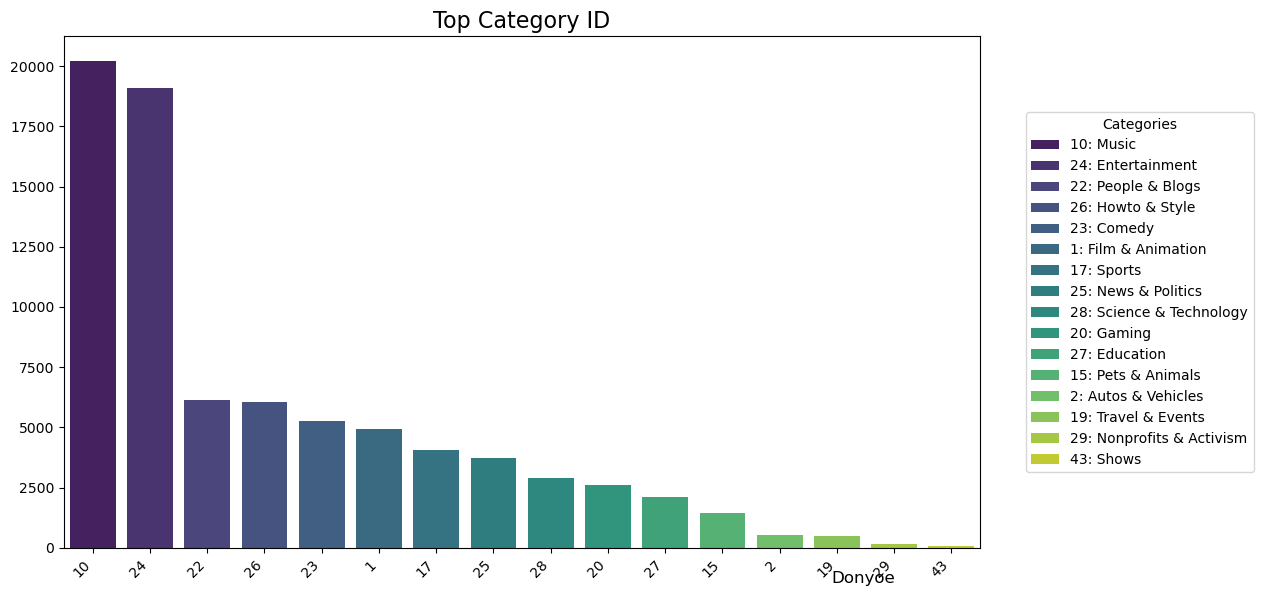

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Group by 'category_id' and count occurrences 
category_counts = merged_df.groupby('category_id').size().reset_index(name='N')

# Sort in descending order
category_counts = category_counts.sort_values(by='N', ascending=False)
category_counts['category_id'] = pd.Categorical(category_counts['category_id'], categories=category_counts['category_id'], ordered=True)

# Create a dictionary to map 'category_id' to descriptive names
category_names = {
    1: "1: Film & Animation",
    2: "2: Autos & Vehicles",
    10: "10: Music",
    15: "15: Pets & Animals",
    17: "17: Sports",
    18: "18: Short Movies",
    19: "19: Travel & Events",
    20: "20: Gaming",
    21: "21: Videoblogging",
    22: "22: People & Blogs",
    23: "23: Comedy",
    24: "24: Entertainment",
    25: "25: News & Politics",
    26: "26: Howto & Style",
    27: "27: Education",
    28: "28: Science & Technology",
    29: "29: Nonprofits & Activism",
    30: "30: Movies",
    31: "31: Anime/Animation",
    32: "32: Action/Adventure",
    33: "33: Classics",
    34: "34: Comedy",
    35: "35: Documentary",
    36: "36: Drama",
    37: "37: Family",
    38: "38: Foreign",
    39: "39: Horror",
    40: "40: Sci-Fi/Fantasy",
    41: "41: Thriller",
    42: "42: Shorts",
    43: "43: Shows",
    44: "44: Trailers"
}

# Map 'category_id' to names in the 'category_counts' DataFrame
category_counts['category_name'] = category_counts['category_id'].map(category_names)

# Plot using seaborn
plt.figure(figsize=(10, 6))
barplot = sns.barplot(data=category_counts, x='category_id', y='N', palette='viridis')  # Assign to 'barplot'

# Customize the plot to match your ggplot2 example
plt.title("Top Category ID", fontsize=16)
plt.xlabel(None)
plt.ylabel(None)
plt.xticks(rotation=45, ha='right') 
plt.tight_layout()
plt.figtext(0.9, 0.02, "Donyoe", horizontalalignment='right', fontsize=12)

# Add a custom legend for category names on the side
handles = barplot.patches
legend_labels = [category_names[int(c)] for c in category_counts['category_id']]

# Position the legend on the right of the plot using 'bbox_to_anchor'
plt.legend(handles=handles[:len(legend_labels)], labels=legend_labels, title='Categories',
           bbox_to_anchor=(1.05, 0.5), loc='center left', borderaxespad=0)

plt.show()

## Data Transformation-Create Engagement Metrics

In [12]:
# Create a new column
merged_df['Engagement Metrics'] = merged_df['likes'] + merged_df['dislikes'] + merged_df['comment_count']
# Display the DataFrame to check the new column
print(merged_df[['likes', 'dislikes', 'comment_count', 'Engagement Metrics']].head())

    likes  dislikes  comment_count  Engagement Metrics
0   55681     10247           9479               75407
1   25561      2294           2757               30612
2  787420     43420         125882              956722
3     193        12             37                 242
4      30         2             30                  62


## Scatter Plot for Engagement Metrics and Views

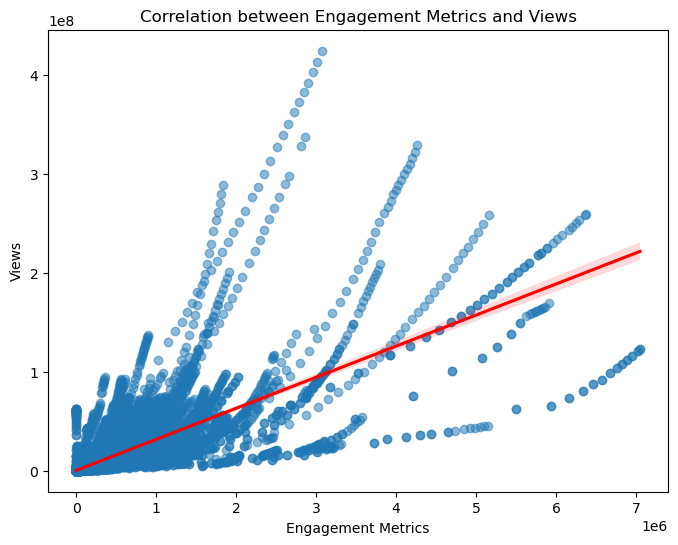

In [13]:
# Create a scatter plot with a regression line
plt.figure(figsize=(8, 6))
sns.regplot(x='Engagement Metrics', y='views', data=merged_df, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Correlation between Engagement Metrics and Views')
plt.xlabel('Engagement Metrics')
plt.ylabel('Views')
plt.show()

## Visualization of Top Viewed Videos

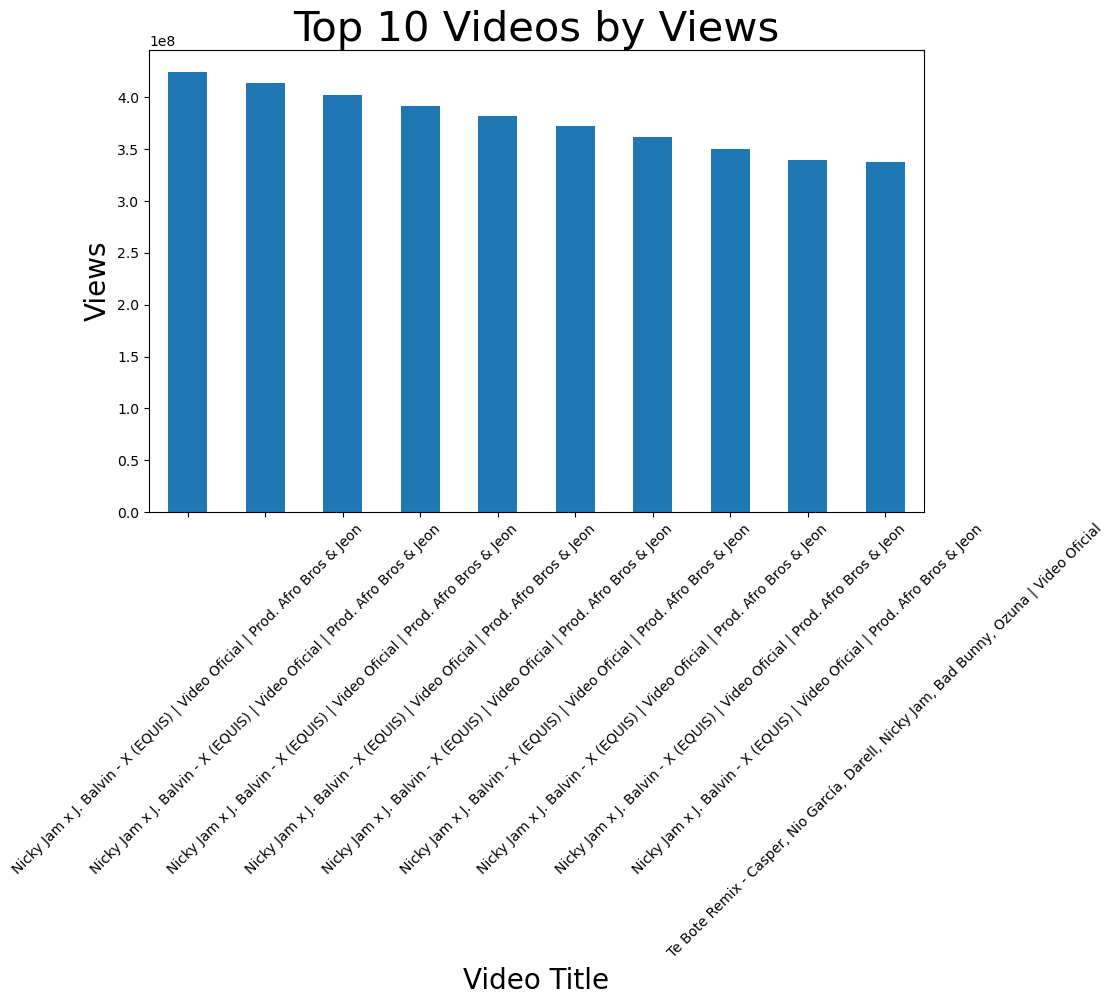

In [14]:
top_videos = merged_df.nlargest(10, 'views')[['title', 'views']]


top_videos.set_index('title')['views'].plot(kind='bar', figsize=(10, 6))
plt.xlabel('Video Title',fontsize=20)
plt.ylabel('Views',fontsize=20)
plt.title('Top 10 Videos by Views',fontsize=30)
plt.xticks(rotation=45)
plt.show()

In [15]:
# Engagement metrics for top 50 videos
top_50_videos = merged_df.nlargest(50, 'views')
print(top_50_videos[['title', 'Engagement Metrics']])

                                                   title  Engagement Metrics
28412  Nicky Jam x J. Balvin - X (EQUIS) | Video Ofic...             3067426
28212  Nicky Jam x J. Balvin - X (EQUIS) | Video Ofic...             3011515
28008  Nicky Jam x J. Balvin - X (EQUIS) | Video Ofic...             2956724
27811  Nicky Jam x J. Balvin - X (EQUIS) | Video Ofic...             2902891
27615  Nicky Jam x J. Balvin - X (EQUIS) | Video Ofic...             2845332
27424  Nicky Jam x J. Balvin - X (EQUIS) | Video Ofic...             2786627
27241  Nicky Jam x J. Balvin - X (EQUIS) | Video Ofic...             2723032
27052  Nicky Jam x J. Balvin - X (EQUIS) | Video Ofic...             2650114
26861  Nicky Jam x J. Balvin - X (EQUIS) | Video Ofic...             2582218
34460  Te Bote Remix - Casper, Nio García, Darell, Ni...             2862074
25545               Bad Bunny - Amorfoda | Video Oficial             4264625
34292  Te Bote Remix - Casper, Nio García, Darell, Ni...             2813339

### Top 50 Channels

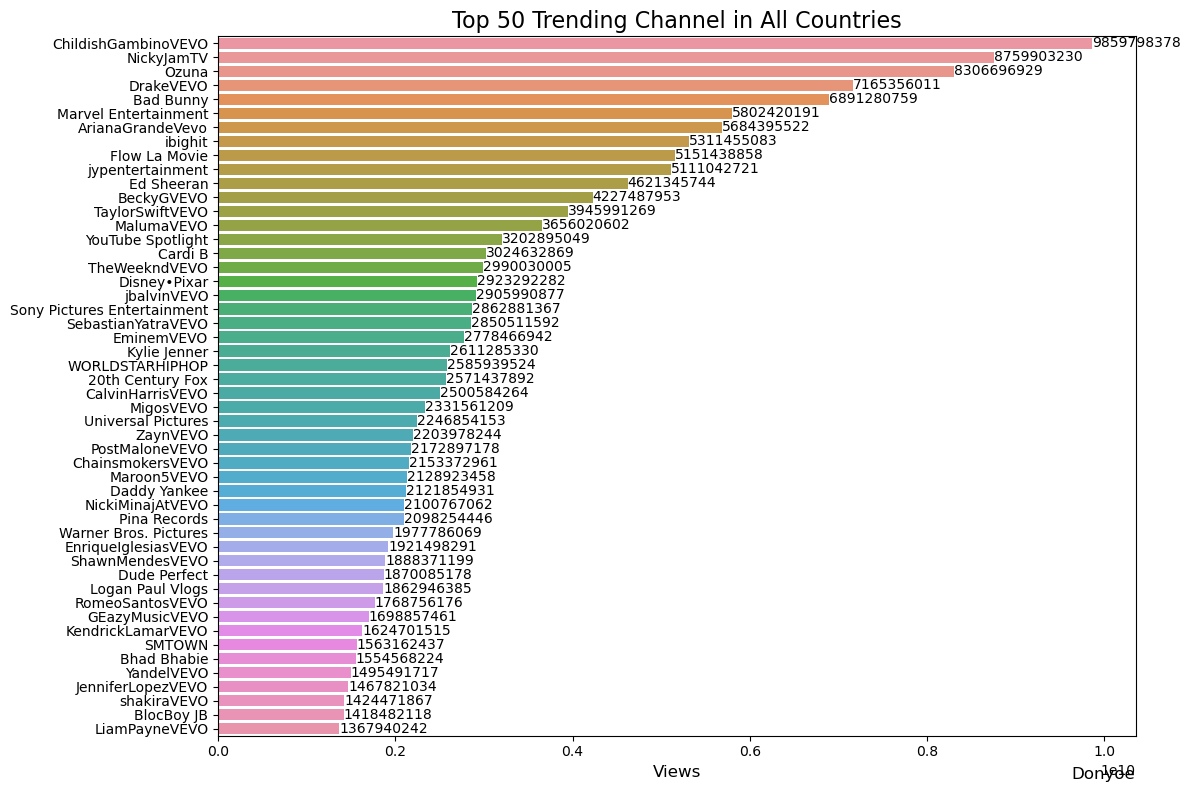

In [16]:
channel_counts = merged_df.groupby('channel_title')['views'].sum().reset_index()

# Sort values and select top 10 channels
top_10_channels = channel_counts.sort_values(by='views', ascending=False).head(50)

# Plot using seaborn
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='views', y='channel_title', data=top_10_channels,orient='h')

# Add labels
for index, value in enumerate(top_10_channels['views']):
    ax.text(value, index, str(value), va='center', ha='left', color='black')

# Customize the plot
plt.title('Top 50 Trending Channel in All Countries', fontsize=16)
plt.xlabel('Views', fontsize=12)
plt.ylabel(None)
plt.xticks(rotation=0)  # x-axis ticks don't need rotation in horizontal bar plot
plt.tight_layout()

# Add caption
plt.figtext(0.95, 0.02, "Donyoe", horizontalalignment='right', fontsize=12)

# Show the plot
plt.show()

## Normalize and Standardize Data

### Heatmap for Views and Key Factors

                  views     likes  dislikes  comment_count
views          1.000000  0.791670  0.405290       0.485986
likes          0.791670  1.000000  0.448010       0.763192
dislikes       0.405290  0.448010  1.000000       0.745064
comment_count  0.485986  0.763192  0.745064       1.000000


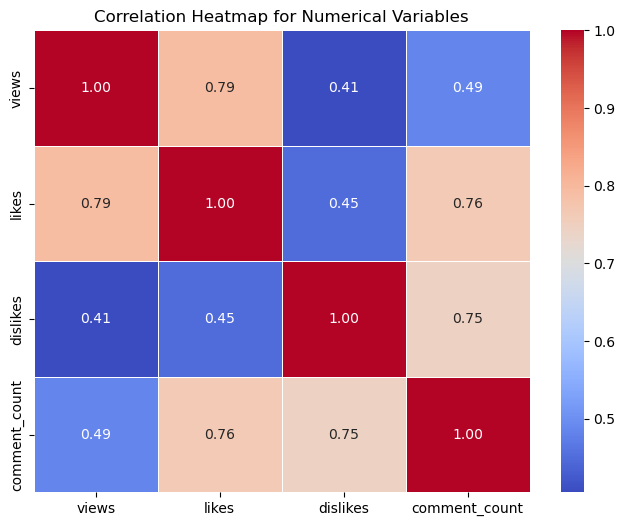

In [17]:
numerical_columns = ['views', 'likes', 'dislikes', 'comment_count', ]

# Compute the correlation matrix
correlation_matrix = merged_df[numerical_columns].corr()
# Display the correlation matrix
print(correlation_matrix)

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap for Numerical Variables')
plt.show()

#### Assign Weights for Key Factors

In [18]:
import pandas as pd

# Assuming the correlation values are manually entered from the heatmap
correlation_values = {
    'likes': 0.784,          # Correlation of likes with views
    'dislikes': 0.416,       # Correlation of dislikes with views
    'comment_count': 0.502 # Correlation of comment_count with views
}

# Convert the correlation values to absolute values
abs_correlations = {key: abs(value) for key, value in correlation_values.items()}

# Calculate the total sum of absolute correlations
total_correlation = sum(abs_correlations.values())

# Calculate weights by normalizing the absolute correlation values
weights = {key: value / total_correlation for key, value in abs_correlations.items()}

# Convert the weights to a DataFrame for better visualization
weights_df = pd.DataFrame(list(weights.items()), columns=['Variable', 'Weight'])

# Display the weights
print("Calculated Weights of Independent Variables Relative to 'Views':")
print(weights_df)

Calculated Weights of Independent Variables Relative to 'Views':
        Variable    Weight
0          likes  0.460635
1       dislikes  0.244418
2  comment_count  0.294947


In [19]:
import pandas as pd

weights = {
    'likes': 0.460435,
    'dislikes': 0.244418,
    'comment_count': 0.294947
}

merged_df['score'] = (
    weights['likes'] * merged_df['likes'] -
    weights['dislikes'] * merged_df['dislikes'] +
    weights['comment_count'] * merged_df['comment_count'] 
)

merged_df['rank'] = merged_df['score'].rank(ascending=False, method='min')

df_sorted = merged_df.sort_values(by='rank')

print(df_sorted)

          video_id trending_date                                  title  \
36638  7C2z4GqqS5E    2018-06-01    BTS (방탄소년단) 'FAKE LOVE' Official MV   
77189  7C2z4GqqS5E    2018-06-01    BTS (방탄소년단) 'FAKE LOVE' Official MV   
76988  7C2z4GqqS5E    2018-05-31    BTS (방탄소년단) 'FAKE LOVE' Official MV   
36468  7C2z4GqqS5E    2018-05-31    BTS (방탄소년단) 'FAKE LOVE' Official MV   
36288  7C2z4GqqS5E    2018-05-30    BTS (방탄소년단) 'FAKE LOVE' Official MV   
...            ...           ...                                    ...   
9146   LFhT6H6pRWg    2017-12-29  PSA from Chairman of the FCC Ajit Pai   
9354   LFhT6H6pRWg    2017-12-30  PSA from Chairman of the FCC Ajit Pai   
9575   LFhT6H6pRWg    2017-12-31  PSA from Chairman of the FCC Ajit Pai   
9777   LFhT6H6pRWg    2018-01-01  PSA from Chairman of the FCC Ajit Pai   
9985   LFhT6H6pRWg    2018-01-02  PSA from Chairman of the FCC Ajit Pai   

      channel_title  category_id        publish_time  \
36638       ibighit           10 2018-05-18

### Refined EDA for Top 50 Channels

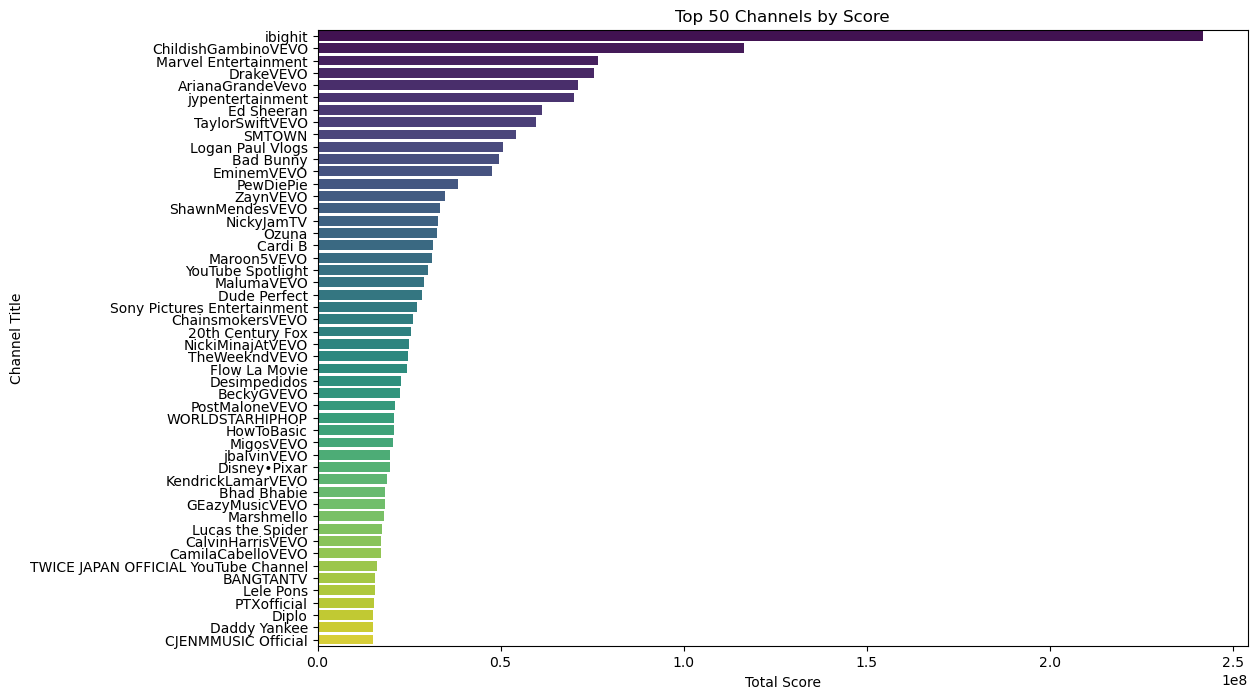

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your DataFrame is named 'train'
weights = {
    'likes': 0.460435,
    'dislikes': 0.244418,
    'comment_count': 0.294947
}

# Calculate score and rank
merged_df['score'] = (
    weights['likes'] * merged_df['likes'] -
    weights['dislikes'] * merged_df['dislikes'] +
    weights['comment_count'] * merged_df['comment_count']
)

merged_df['rank'] = merged_df['score'].rank(ascending=False, method='min')

# Group by channel_title and sum the scores
channel_scores = merged_df.groupby('channel_title')['score'].sum().reset_index()

# Sort by total score and get top 50 channels
top_channels = channel_scores.sort_values(by='score', ascending=False).head(50)

# Create a bar plot for the top 50 channels
plt.figure(figsize=(12, 8))
sns.barplot(x='score', y='channel_title', data=top_channels, palette='viridis')
plt.title('Top 50 Channels by Score')
plt.xlabel('Total Score')
plt.ylabel('Channel Title')
plt.show()

## Create Word Cloud

### Video Titles

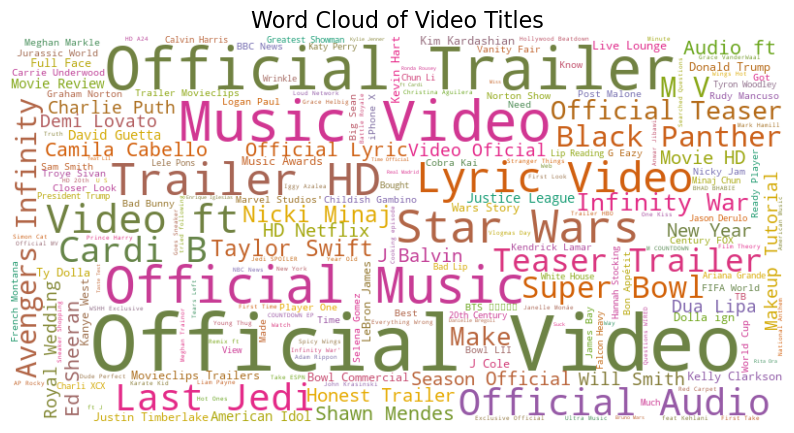

In [21]:
from wordcloud import WordCloud
from palettable.colorbrewer.qualitative import Dark2_6

# Assuming your DataFrame is named 'mergeda_df'
# Concatenate all titles into a single string
all_titles = " ".join(merged_df['title'].astype(str))

# Set up the color palette (equivalent to R's "Dark2")
cmap = Dark2_6.mpl_colormap

# Create a WordCloud object
wordcloud = WordCloud(
    background_color="white",
    max_words=200,
    colormap=cmap,        
    width=800,             
    height=400,            
    random_state=42        
)

# Generate the word cloud from the titles
wordcloud.generate(all_titles)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")  # Turn off the axis
plt.title('Word Cloud of Video Titles', fontsize=16)
plt.show()

### Channel Titles

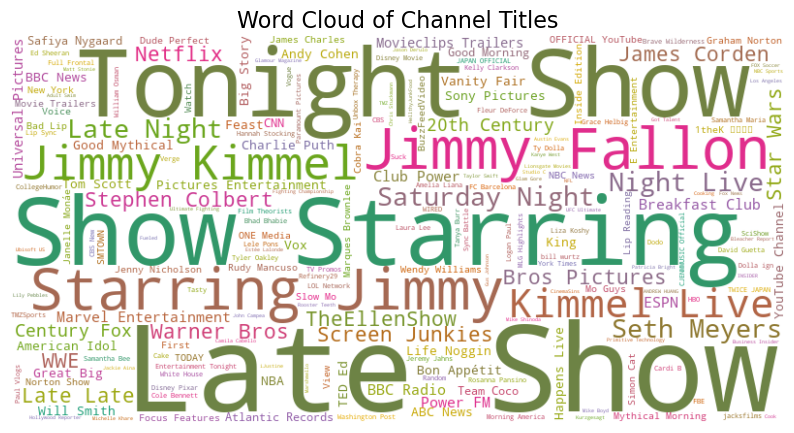

In [22]:
all_channel_titles = " ".join(merged_df['channel_title'].astype(str))

# Set up the color palette (equivalent to R's "Dark2")
cmap = Dark2_6.mpl_colormap

# Create a WordCloud object
wordcloud = WordCloud(
    background_color="white",
    max_words=200,
    colormap=cmap,        
    width=800,             
    height=400,            
    random_state=42        
)

# Generate the word cloud from the titles
wordcloud.generate(all_channel_titles)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")  # Turn off the axis
plt.title('Word Cloud of Channel Titles', fontsize=16)
plt.show()

### Video Tags

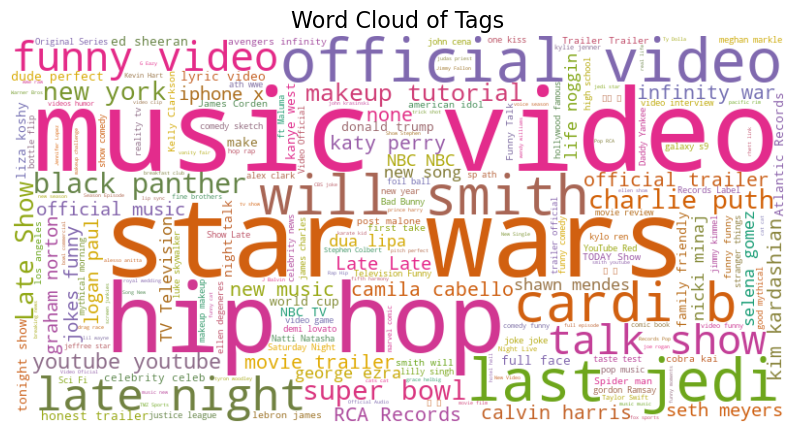

In [23]:
# Creating Word Cloud-tags
all_tags = " ".join(merged_df['tags'].astype(str))

# Set up the color palette (equivalent to R's "Dark2")
cmap = Dark2_6.mpl_colormap

# Create a WordCloud object
wordcloud = WordCloud(
    background_color="white",
    max_words=200,
    colormap=cmap,        
    width=800,             
    height=400,            
    random_state=42        
)

# Generate the word cloud from the titles
wordcloud.generate(all_tags)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")  # Turn off the axis
plt.title('Word Cloud of Tags', fontsize=16)
plt.show()

### Video Descriptions

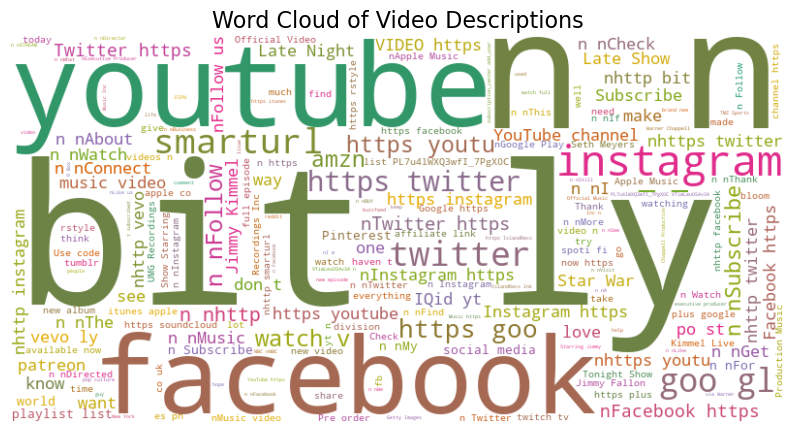

In [24]:
all_description = " ".join(merged_df['description'].astype(str))

# Set up the color palette (equivalent to R's "Dark2")
cmap = Dark2_6.mpl_colormap

# Create a WordCloud object
wordcloud = WordCloud(
    background_color="white",
    max_words=200,
    colormap=cmap,        
    width=800,             
    height=400,            
    random_state=42        
)

# Generate the word cloud from the titles
wordcloud.generate(all_description)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")  # Turn off the axis
plt.title('Word Cloud of Video Descriptions', fontsize=16)
plt.show()

# Drop Unnecessary Columns

In [25]:
#drop columns
merged_df.drop(columns=['thumbnail_link', 'video_id','comments_disabled','ratings_disabled','video_error_or_removed'], inplace=True)

print(merged_df.head())

  trending_date                                              title  \
0    2017-11-14      John Lewis Christmas Ad 2017 - #MozTheMonster   
1    2017-11-14          Taylor Swift: …Ready for It? (Live) - SNL   
2    2017-11-14         Eminem - Walk On Water (Audio) ft. Beyoncé   
3    2017-11-14  Goals from Salford City vs Class of 92 and Fri...   
4    2017-11-14  Dashcam captures truck's near miss with child ...   

                channel_title  category_id        publish_time  \
0                  John Lewis           26 2017-11-10 07:38:29   
1         Saturday Night Live           24 2017-11-12 06:24:44   
2                  EminemVEVO           10 2017-11-10 17:00:03   
3  Salford City Football Club           17 2017-11-13 02:30:38   
4            Cute Girl Videos           25 2017-11-13 01:45:13   

                                                tags     views   likes  \
0  christmas|"john lewis christmas"|"john lewis"|...   7224515   55681   
1  SNL|"Saturday Night Live"|"SNL 

# Text Preprocessing 

In [26]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import re

# Get the list of default English stopwords
stop_words = set(stopwords.words('english'))

# Function to remove stopwords and clean text
def clean_text(text):
    # Lowercase the text
    text = text.lower()
    
    # Remove non-alphabetical characters (retain only letters and spaces)
    text = re.sub(r'[^a-z\s]', '', text)
    
    # Split text into words
    words = text.split()
    
    # Remove stopwords
    remove_stopwords = [word for word in words if word not in stop_words]
    
    # Join the cleaned words back into a string
    new_text = ' '.join(remove_stopwords)
    
    return new_text
    data = {'title','description','text'}
    
# Apply the clean_text function to the 'title' column in merged_df1
merged_df['new_text'] = merged_df['title'].apply(clean_text)

# Display the cleaned DataFrame
print(merged_df)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/yuhanzhao/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


      trending_date                                              title  \
0        2017-11-14      John Lewis Christmas Ad 2017 - #MozTheMonster   
1        2017-11-14          Taylor Swift: …Ready for It? (Live) - SNL   
2        2017-11-14         Eminem - Walk On Water (Audio) ft. Beyoncé   
3        2017-11-14  Goals from Salford City vs Class of 92 and Fri...   
4        2017-11-14  Dashcam captures truck's near miss with child ...   
...             ...                                                ...   
79860    2018-06-14                       The Cat Who Caught the Laser   
79861    2018-06-14                         True Facts : Ant Mutualism   
79862    2018-06-14  I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...   
79863    2018-06-14                How Black Panther Should Have Ended   
79864    2018-06-14  Official Call of Duty®: Black Ops 4 — Multipla...   

                    channel_title  category_id        publish_time  \
0                      John Lewis        

In [27]:
# Check the data types of each column
print(merged_df.dtypes)

trending_date           datetime64[ns]
title                           object
channel_title                   object
category_id                      int64
publish_time            datetime64[ns]
tags                            object
views                            int64
likes                            int64
dislikes                         int64
comment_count                    int64
description                     object
trending_day_of_week            object
day_of_week                     object
Engagement Metrics               int64
score                          float64
rank                           float64
new_text                        object
dtype: object


# Split the Dataset into Train and Test by 80/20

In [28]:
from sklearn.model_selection import train_test_split

X = merged_df.drop(columns=['views'])  # Drop 'views' from features to get X
y = merged_df['views']
# Assuming you have a dataset with features X and target y
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

train = pd.DataFrame(X_train)
train['views'] = y_train.values

test = pd.DataFrame(X_test)
test['views'] = y_test.values

# Feature Engineering

## Days Since Published

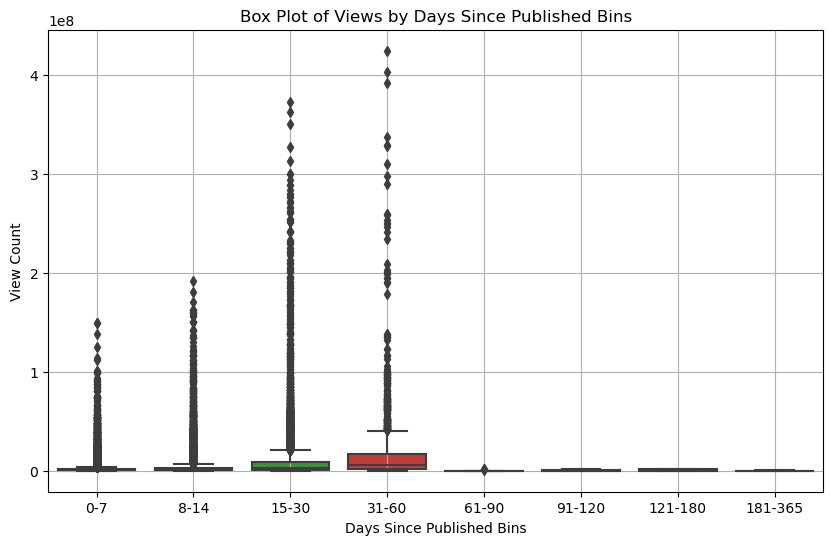

In [29]:
#convert the type of publish time
train['publish_time'] = pd.to_datetime(train['publish_time'])
train['trending_date'] = pd.to_datetime(train['trending_date'], format='%Y-%m-%d')

# Creating a new feature 'days_since_published'
train['days_since_published'] = (train['trending_date'] - train['publish_time']).dt.days

# Creating bins for days since published
bins = [0, 7, 14, 30, 60, 90, 120, 180, 365]  # Example bins
labels = ['0-7', '8-14', '15-30', '31-60', '61-90', '91-120', '121-180', '181-365']
train['days_bins'] = pd.cut(train['days_since_published'], bins=bins, labels=labels)

plt.figure(figsize=(10, 6))
sns.boxplot(data=train, x='days_bins', y='views')
plt.title('Box Plot of Views by Days Since Published Bins')
plt.xlabel('Days Since Published Bins')
plt.ylabel('View Count')
plt.grid(True)
plt.show()

## Sentimental Analysis

### Sentiment Polarity Distribution

Average Description Sentiment Score: 0.1716764242965884
Average Title Sentiment Score: 0.0477964529239135


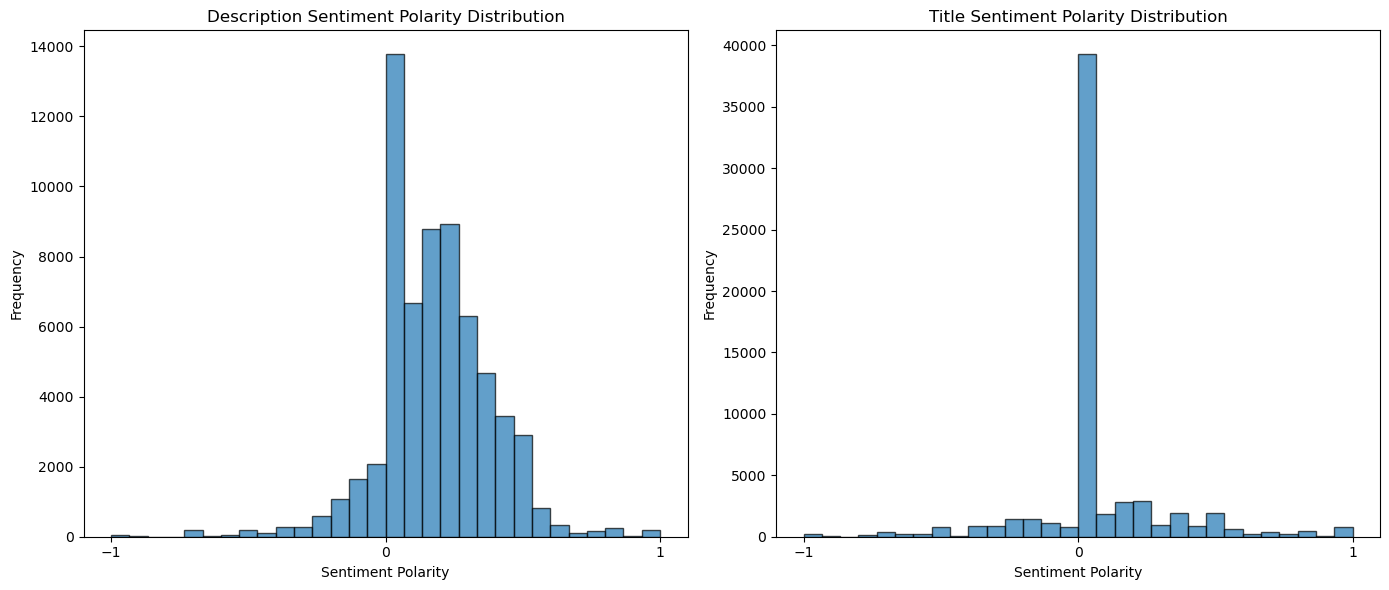

In [30]:
from textblob import TextBlob
import matplotlib.pyplot as plt

# Calculate sentiment polarity for description and title
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

# Apply sentiment analysis
train['description_sentiment'] = train['description'].fillna('').apply(get_sentiment)
train['title_sentiment'] = train['title'].fillna('').apply(get_sentiment)

# Calculate average sentiment scores
avg_description_sentiment = train['description_sentiment'].mean()
avg_title_sentiment = train['title_sentiment'].mean()

print("Average Description Sentiment Score:", avg_description_sentiment)
print("Average Title Sentiment Score:", avg_title_sentiment)

# Plotting the sentiment distributions
plt.figure(figsize=(14, 6))

# Description Sentiment Histogram
plt.subplot(1, 2, 1)
plt.hist(train['description_sentiment'], bins=30, alpha=0.7, edgecolor='black')
plt.title('Description Sentiment Polarity Distribution')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.xticks([-1, 0, 1])

# Title Sentiment Histogram
plt.subplot(1, 2, 2)
plt.hist(train['title_sentiment'], bins=30, alpha=0.7, edgecolor='black')
plt.title('Title Sentiment Polarity Distribution')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.xticks([-1, 0, 1])

plt.tight_layout()
plt.show()

### Visualize the Sentiment Distrubution

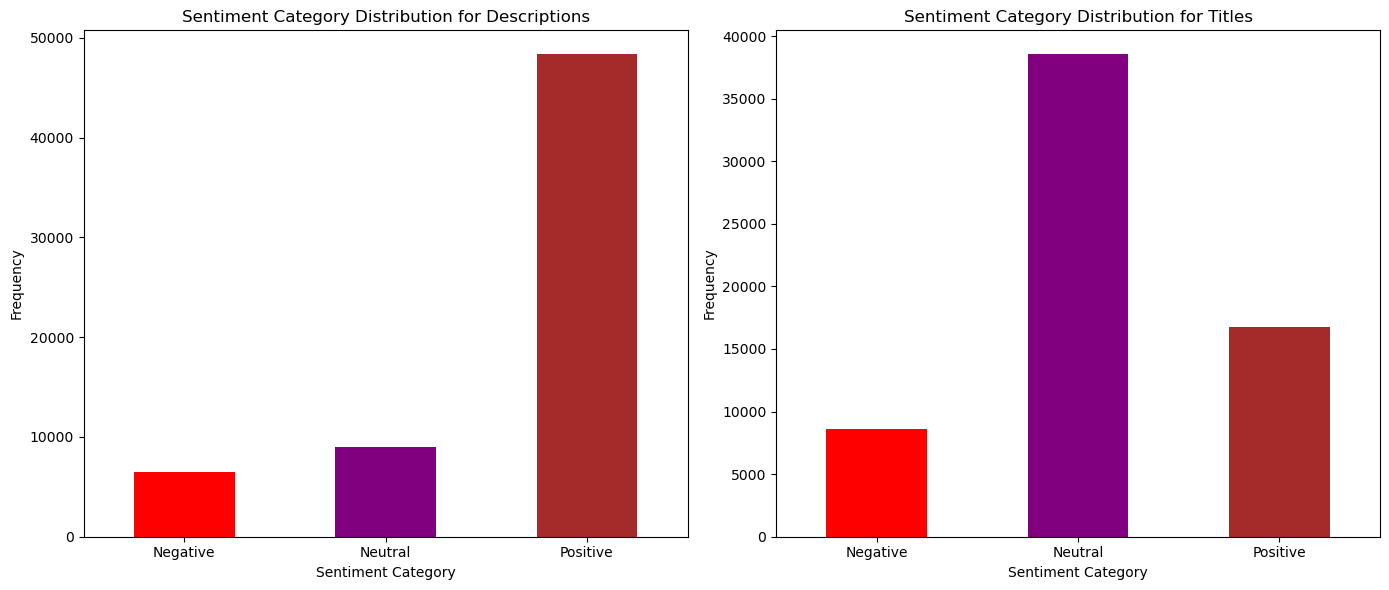

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# Define sentiment categories
def categorize_sentiment(polarity):
    if polarity > 0:
        return 'Positive'
    elif polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Apply categorization to sentiment columns
train['description_sentiment_category'] = train['description_sentiment'].apply(categorize_sentiment)
train['title_sentiment_category'] = train['title_sentiment'].apply(categorize_sentiment)

# Plot sentiment category distribution for descriptions and titles
plt.figure(figsize=(14, 6))

# Custom order for categories
category_order = ['Negative', 'Neutral', 'Positive']

# Plot `description` sentiment distribution
plt.subplot(1, 2, 1)
description_sentiment_counts = train['description_sentiment_category'].value_counts().reindex(category_order)
description_sentiment_counts.plot(kind='bar', color=['red', 'purple', 'brown'])
plt.title('Sentiment Category Distribution for Descriptions')
plt.xlabel('Sentiment Category')
plt.ylabel('Frequency')
plt.xticks(rotation=0)

# Plot `title` sentiment distribution
plt.subplot(1, 2, 2)
title_sentiment_counts = train['title_sentiment_category'].value_counts().reindex(category_order)
title_sentiment_counts.plot(kind='bar', color=['red', 'purple', 'brown'])
plt.title('Sentiment Category Distribution for Titles')
plt.xlabel('Sentiment Category')
plt.ylabel('Frequency')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

## Create TF-IDF Feature 

### `description` Column

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
 
# Ensure the 'description' column exists in the DataFrame
if 'description' in train.columns:
    # Assuming 'description' column contains the text data
    text_data = train['description'].fillna('')  # Handle missing values
    
    # Check if text_data is iterable, not a single string
    if isinstance(text_data, pd.Series):
        # Initialize the TF-IDF Vectorizer
        tfidf_vectorizer = TfidfVectorizer(max_features=100, stop_words='english')
        
        # Fit and transform the text data to generate the TF-IDF matrix
        tfidf_matrix = tfidf_vectorizer.fit_transform(text_data)
        
        # Convert the sparse matrix into a DataFrame for easier manipulation
        tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
        
        # Function to get top N features per row based on TF-IDF score
        def get_top_tfidf_features(row, features, top_n=5):
            top_indices = np.argsort(row)[::-1][:top_n]  # Get the indices of the top n features
            top_features = [(features[i], row[i]) for i in top_indices]  # Get feature names and scores
            return top_features

        # Apply the function to each row in the TF-IDF matrix
        top_tfidf_features = [get_top_tfidf_features(row, tfidf_vectorizer.get_feature_names_out(), top_n=5) 
                              for row in tfidf_matrix.toarray()]
        
        # Add the top TF-IDF features as a new column in the original DataFrame
        train['top_tfidf_features'] = top_tfidf_features
        
        # Display the entire first 5 rows of the DataFrame including the top TF-IDF features
        print(train.head(5))
    else:
        print("The 'description' column should be a pandas Series.")
else:
    print("The DataFrame does not contain a 'description' column.")

      trending_date                                              title  \
23604    2018-03-14                   Marshmello & Anne-Marie: Friends   
25630    2018-03-24  Kirby Star Allies' Surprising HD Rumble Secret...   
68698    2018-04-20  Stephen A.: Kevin Hart 'got his feelings hurt'...   
39559    2017-11-17                              How to be an Aquarius   
62877    2018-03-16  Charlie Puth - Done For Me (feat. Kehlani) [Of...   

                                channel_title  category_id  \
23604  The Tonight Show Starring Jimmy Fallon           23   
25630                              GameXplain           20   
68698                                    ESPN           17   
39559                                Sailor J           24   
62877                            Charlie Puth           10   

             publish_time                                               tags  \
23604 2018-03-07 14:00:03  The Tonight Show|"Jimmy Fallon"|"Marshmello"|"...   
25630 2018-03-16 04:00

### `tags` Column

In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
 
# Ensure the 'description' column exists in the DataFrame
if 'tags' in train.columns:
    # Assuming 'description' column contains the text data
    text_data = train['tags'].fillna('')  # Handle missing values
    
    # Check if text_data is iterable, not a single string
    if isinstance(text_data, pd.Series):
        # Initialize the TF-IDF Vectorizer
        tfidf_vectorizer = TfidfVectorizer(max_features=100, stop_words='english')
        
        # Fit and transform the text data to generate the TF-IDF matrix
        tfidf_matrix = tfidf_vectorizer.fit_transform(text_data)
        
        # Convert the sparse matrix into a DataFrame for easier manipulation
        tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
        
        # Function to get top N features per row based on TF-IDF score
        def get_top_tfidf_features(row, features, top_n=5):
            top_indices = np.argsort(row)[::-1][:top_n]  # Get the indices of the top n features
            top_features = [(features[i], row[i]) for i in top_indices]  # Get feature names and scores
            return top_features

        # Apply the function to each row in the TF-IDF matrix
        top_tfidf_features = [get_top_tfidf_features(row, tfidf_vectorizer.get_feature_names_out(), top_n=5) 
                              for row in tfidf_matrix.toarray()]
        
        # Add the top TF-IDF features as a new column in the original DataFrame
        train['top_tfidf_features'] = top_tfidf_features
        
        # Display the entire first 5 rows of the DataFrame including the top TF-IDF features
        print(train.head(5))
    else:
        print("The 'description' column should be a pandas Series.")
else:
    print("The DataFrame does not contain a 'description' column.")

      trending_date                                              title  \
23604    2018-03-14                   Marshmello & Anne-Marie: Friends   
25630    2018-03-24  Kirby Star Allies' Surprising HD Rumble Secret...   
68698    2018-04-20  Stephen A.: Kevin Hart 'got his feelings hurt'...   
39559    2017-11-17                              How to be an Aquarius   
62877    2018-03-16  Charlie Puth - Done For Me (feat. Kehlani) [Of...   

                                channel_title  category_id  \
23604  The Tonight Show Starring Jimmy Fallon           23   
25630                              GameXplain           20   
68698                                    ESPN           17   
39559                                Sailor J           24   
62877                            Charlie Puth           10   

             publish_time                                               tags  \
23604 2018-03-07 14:00:03  The Tonight Show|"Jimmy Fallon"|"Marshmello"|"...   
25630 2018-03-16 04:00

## Dimension Reduction-PCA

In [34]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

non_numeric_cols = ['publish_time', 'title', 'channel_title', 'tags', 'description', 'trending_date', 'trending_day_of_week', 'day_of_week']
X_train_model = train.drop(columns=non_numeric_cols + ['views']).select_dtypes(include=[float, int])
X_test_model = test.drop(columns=non_numeric_cols + ['views']).select_dtypes(include=[float, int])

X_test_model = X_test_model.reindex(columns=X_train_model.columns, fill_value=0)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_model)
X_test_scaled = scaler.transform(X_test_model)

print("Missing values in X_train_model:\n", X_train_model.isna().sum())
print("Missing values in X_test_model:\n", X_test_model.isna().sum())


Missing values in X_train_model:
 category_id              0
likes                    0
dislikes                 0
comment_count            0
Engagement Metrics       0
score                    0
rank                     0
days_since_published     0
description_sentiment    0
title_sentiment          0
dtype: int64
Missing values in X_test_model:
 category_id              0
likes                    0
dislikes                 0
comment_count            0
Engagement Metrics       0
score                    0
rank                     0
days_since_published     0
description_sentiment    0
title_sentiment          0
dtype: int64


## Visualize PCA

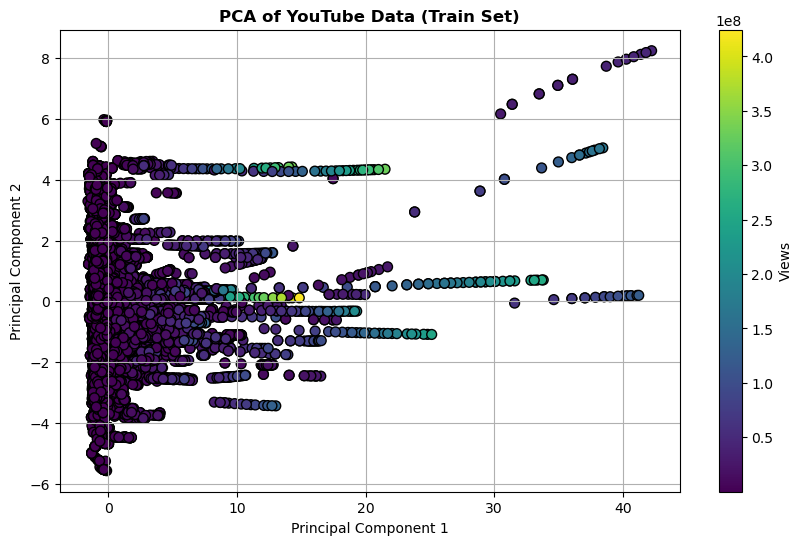

Explained Variance per component:
PC1: 43.35%
PC2: 12.56%
PC3: 11.40%
PC4: 10.22%
PC5: 7.73%
PC6: 7.47%
PC7: 5.90%


In [35]:
# Apply PCA (Reduce to n components to capture 95% of variance)
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Visualize the PCA results (Plot only the first two components)
plt.figure(figsize=(10, 6))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='viridis', edgecolor='k', s=50)
plt.colorbar(label='Views')
plt.title('PCA of YouTube Data (Train Set)', weight='bold')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

# Explained variance for all components selected by PCA
explained_variance = pca.explained_variance_ratio_
print("Explained Variance per component:")
for i, variance in enumerate(explained_variance, start=1):
     print(f"PC{i}: {variance:.2%}")


# Model Building

### Load Library

In [36]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd

### Define Model Metrics

In [37]:
def calculate_metrics(model, X_train, y_train, X_test, y_test):
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)

    # Calculate RMSE and R^2 for training and test sets
    train_rmse = np.sqrt(mean_squared_error(y_train, train_preds))
    test_rmse = np.sqrt(mean_squared_error(y_test, test_preds))
    train_r2 = r2_score(y_train, train_preds)
    test_r2 = r2_score(y_test, test_preds)

    return {
        "Train RMSE": train_rmse, "Test RMSE": val_rmse,
        "Train R^2": train_r2, "Test R^2": val_r2
    }

### Introduce Model

In [38]:
# Define a function to train the model with specific hyperparameters
def train_xgboost(X_train, y_train, X_test, y_test, params):
    model = xgb.XGBRegressor(**params, random_state=42)
    model.fit(X_train, y_train)

    # Calculate and return metrics
    metrics = calculate_metrics(model, X_train, y_train, X_test, y_test)
    return model, metrics


### Define Optimal Hyperparameter Variations

In [39]:
# Define hyperparameter variations
variations = [
    {"learning_rate": 0.05, "n_estimators": 200, "max_depth": 6}
]

In [40]:
# Initialize a DataFrame to store results for each variation
results = pd.DataFrame(columns=["Variation", "Train RMSE", "Test RMSE", "Train R^2", "Test R^2"])


### Introduce Dataset to Fit Model

In [41]:
# Create a list of columns to drop if they exist
text_columns = ['title', 'channel_title', 'tags', 'description', 'location', 'new_text']
X_train.drop([col for col in text_columns if col in X_train.columns], axis=1, inplace=True)
X_test.drop([col for col in text_columns if col in X_test.columns], axis=1, inplace=True)

# Encode categorical features using one-hot encoding for consistency
categorical_columns = ['trending_day_of_week', 'day_of_week', 'days_bins', 'description_sentiment_category', 'title_sentiment_category']
X_train = pd.get_dummies(X_train, columns=[col for col in categorical_columns if col in X_train.columns], drop_first=True)
X_test = pd.get_dummies(X_test, columns=[col for col in categorical_columns if col in X_test.columns], drop_first=True)

# Convert datetime columns to relevant features if they exist
if 'trending_date' in X_train.columns:
    X_train['trending_year'] = X_train['trending_date'].dt.year
    X_train['trending_month'] = X_train['trending_date'].dt.month
    X_train['trending_day'] = X_train['trending_date'].dt.day
    X_train.drop(['trending_date'], axis=1, inplace=True)

if 'trending_date' in X_test.columns:
    X_test['trending_year'] = X_test['trending_date'].dt.year
    X_test['trending_month'] = X_test['trending_date'].dt.month
    X_test['trending_day'] = X_test['trending_date'].dt.day
    X_test.drop(['trending_date'], axis=1, inplace=True)

# Drop 'publish_time' if it exists
if 'publish_time' in X_train.columns:
    X_train.drop(['publish_time'], axis=1, inplace=True)

if 'publish_time' in X_test.columns:
    X_test.drop(['publish_time'], axis=1, inplace=True)

# Ensure X_test has the same columns as X_train
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

# Verify that X_train and X_test now have the same columns
print("X_train columns:", X_train.columns)
print("X_test columns:", X_test.columns)

X_train columns: Index(['category_id', 'likes', 'dislikes', 'comment_count',
       'Engagement Metrics', 'score', 'rank', 'trending_day_of_week_Monday',
       'trending_day_of_week_Saturday', 'trending_day_of_week_Sunday',
       'trending_day_of_week_Thursday', 'trending_day_of_week_Tuesday',
       'trending_day_of_week_Wednesday', 'day_of_week_Monday',
       'day_of_week_Saturday', 'day_of_week_Sunday', 'day_of_week_Thursday',
       'day_of_week_Tuesday', 'day_of_week_Wednesday', 'trending_year',
       'trending_month', 'trending_day'],
      dtype='object')
X_test columns: Index(['category_id', 'likes', 'dislikes', 'comment_count',
       'Engagement Metrics', 'score', 'rank', 'trending_day_of_week_Monday',
       'trending_day_of_week_Saturday', 'trending_day_of_week_Sunday',
       'trending_day_of_week_Thursday', 'trending_day_of_week_Tuesday',
       'trending_day_of_week_Wednesday', 'day_of_week_Monday',
       'day_of_week_Saturday', 'day_of_week_Sunday', 'day_of_week_Th

### Calculate the Metrics

In [42]:
def calculate_metrics(model, X_train, y_train, X_test, y_test):
    # Predictions
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)
    
    # Calculate metrics
    train_rmse = np.sqrt(mean_squared_error(y_train, train_preds))
    test_rmse = np.sqrt(mean_squared_error(y_test, test_preds))
    
    train_r2 = r2_score(y_train, train_preds)
    test_r2 = r2_score(y_test, test_preds)

    return {
        "Train RMSE": train_rmse,
        "Test RMSE": test_rmse,  # Changed from val_rmse to test_rmse
        "Train R^2": train_r2,
        "Test R^2": test_r2
    }

In [43]:
# Create an empty DataFrame if it isn't already
results = pd.DataFrame()

# Train models for each variation and record results
for i, params in enumerate(variations):
    model, metrics = train_xgboost(X_train, y_train, X_test, y_test, params)
    
    # Create a DataFrame with the metrics for this variation
    result_row = pd.DataFrame({
        "Variation": [f"Variation {i + 1}"],
        **metrics
    })
    
    # Concatenate the new row to the results DataFrame
    results = pd.concat([results, result_row], ignore_index=True)

### Display the Model Metrics

In [44]:
# Display the comparison table
print("Comparison of XGBoost Model Variations:")
print(results)
best_model_index = results["Test RMSE"].idxmin()
best_params = variations[best_model_index]
print(f"\n Model Variation: {best_model_index + 1}")
print(f"Hyperparameters: {best_params}")
print(results.iloc[best_model_index])

Comparison of XGBoost Model Variations:
     Variation    Train RMSE     Test RMSE  Train R^2  Test R^2
0  Variation 1  2.120971e+06  2.909246e+06   0.978047  0.960791

 Model Variation: 1
Hyperparameters: {'learning_rate': 0.05, 'n_estimators': 200, 'max_depth': 6}
Variation        Variation 1
Train RMSE    2120971.173631
Test RMSE     2909245.576456
Train R^2           0.978047
Test R^2            0.960791
Name: 0, dtype: object


#  Explain the model

## Define Features Importance

In [45]:
# Get feature importances directly
feature_importances = model.feature_importances_

feature_importances_adjusted = feature_importances[:len(X.columns)]

# Generate feature importance DataFrame
top_features = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances_adjusted}).sort_values(by='Importance', ascending=False)
top_10_features = top_features.head(10)

print("Top 10 Features:\n", top_10_features)

Top 10 Features:
           Feature  Importance
1           title    0.437080
4    publish_time    0.193274
2   channel_title    0.085307
5            tags    0.051353
3     category_id    0.048652
14           rank    0.040345
15       new_text    0.027795
6           likes    0.009272
13          score    0.009106
0   trending_date    0.008889


## Extracting and Analyzing 5 Individual Predictions by Using SHAP


Explanation for sample 1 (Index: 49053):
Sample details:


category_id  likes  dislikes  comment_count  Engagement Metrics  \
49053           23   2837        86            191                3114   

             score     rank  trending_day_of_week_Monday  \
49053  1341.569024  67271.0                        False   

       trending_day_of_week_Saturday  trending_day_of_week_Sunday  ...  \
49053                          False                        False  ...   

       trending_day_of_week_Wednesday  day_of_week_Monday  \
49053                            True               False   

       day_of_week_Saturday  day_of_week_Sunday  day_of_week_Thursday  \
49053                 False               False                 False   

       day_of_week_Tuesday  day_of_week_Wednesday  trending_year  \
49053                 True                  False           2018   

       trending_month  trending_day  
49053               1             3  

[1 rows x 22 columns]

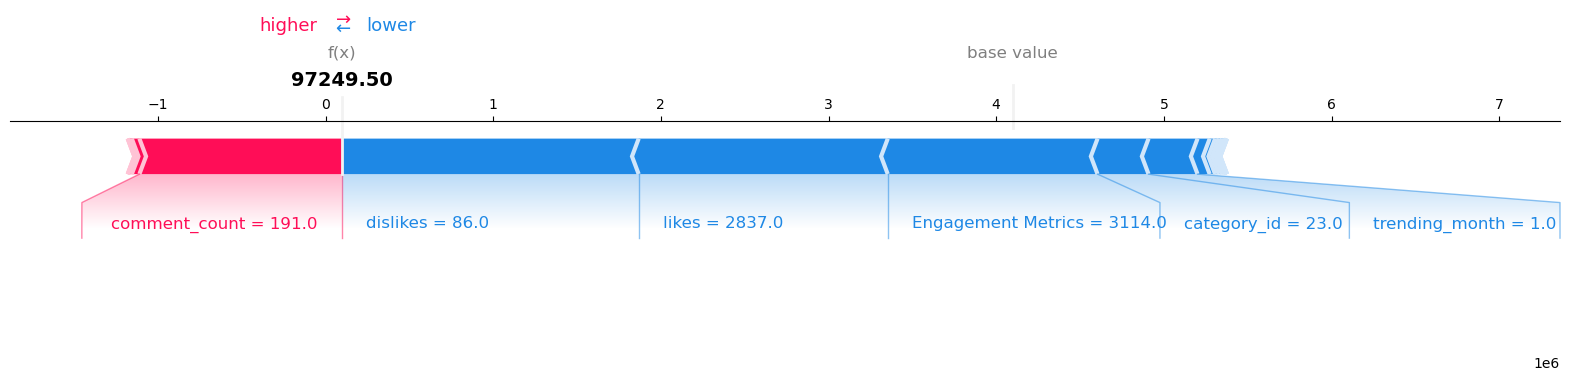

Top contributing features:
                      shap_value
feature                         
dislikes           -1.770361e+06
likes              -1.485569e+06
Engagement Metrics -1.251085e+06
comment_count       1.207505e+06
category_id        -3.041747e+05
To flip from 0 to 1, consider increasing the values of the most positive SHAP-contributing features.
 - dislikes: Consider a increase of 1770361.00 SHAP impact units to potentially achieve a prediction flip.
 - likes: Consider a increase of 1485569.25 SHAP impact units to potentially achieve a prediction flip.
 - Engagement Metrics: Consider a increase of 1251085.25 SHAP impact units to potentially achieve a prediction flip.
 - comment_count: Consider a decrease of 1207504.88 SHAP impact units to potentially achieve a prediction flip.
 - category_id: Consider a increase of 304174.72 SHAP impact units to potentially achieve a prediction flip.

Explanation for sample 2 (Index: 71003):
Sample details:


category_id   likes  dislikes  comment_count  Engagement Metrics  \
71003           10  284363      4674           8504              297541   

               score    rank  trending_day_of_week_Monday  \
71003  132296.497461  6956.0                        False   

       trending_day_of_week_Saturday  trending_day_of_week_Sunday  ...  \
71003                          False                        False  ...   

       trending_day_of_week_Wednesday  day_of_week_Monday  \
71003                           False               False   

       day_of_week_Saturday  day_of_week_Sunday  day_of_week_Thursday  \
71003                 False               False                 False   

       day_of_week_Tuesday  day_of_week_Wednesday  trending_year  \
71003                False                  False           2018   

       trending_month  trending_day  
71003               5             1  

[1 rows x 22 columns]

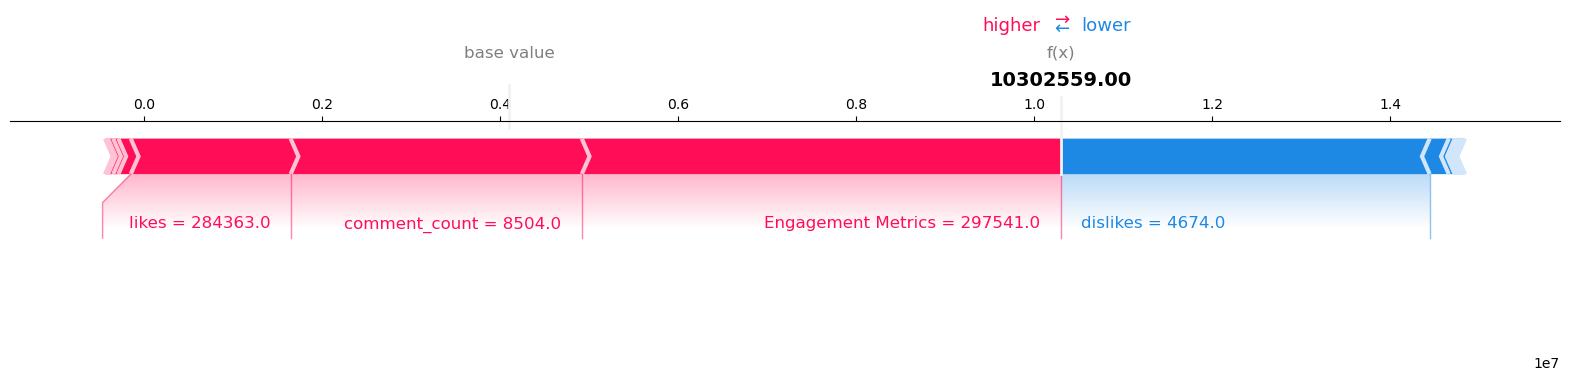

Top contributing features:
                      shap_value
feature                         
Engagement Metrics  5.385756e+06
dislikes           -4.143052e+06
comment_count       3.271754e+06
likes               1.796564e+06
trending_month     -2.142298e+05
To flip from 0 to 1, consider increasing the values of the most positive SHAP-contributing features.
 - Engagement Metrics: Consider a decrease of 5385756.50 SHAP impact units to potentially achieve a prediction flip.
 - dislikes: Consider a increase of 4143051.75 SHAP impact units to potentially achieve a prediction flip.
 - comment_count: Consider a decrease of 3271753.75 SHAP impact units to potentially achieve a prediction flip.
 - likes: Consider a decrease of 1796563.62 SHAP impact units to potentially achieve a prediction flip.
 - trending_month: Consider a increase of 214229.80 SHAP impact units to potentially achieve a prediction flip.

Explanation for sample 3 (Index: 31981):
Sample details:


category_id  likes  dislikes  comment_count  Engagement Metrics  \
31981           10  85715      2685           2197               90597   

              score     rank  trending_day_of_week_Monday  \
31981  39457.922254  19474.0                        False   

       trending_day_of_week_Saturday  trending_day_of_week_Sunday  ...  \
31981                          False                        False  ...   

       trending_day_of_week_Wednesday  day_of_week_Monday  \
31981                           False               False   

       day_of_week_Saturday  day_of_week_Sunday  day_of_week_Thursday  \
31981                 False               False                 False   

       day_of_week_Tuesday  day_of_week_Wednesday  trending_year  \
31981                False                  False           2018   

       trending_month  trending_day  
31981               5             3  

[1 rows x 22 columns]

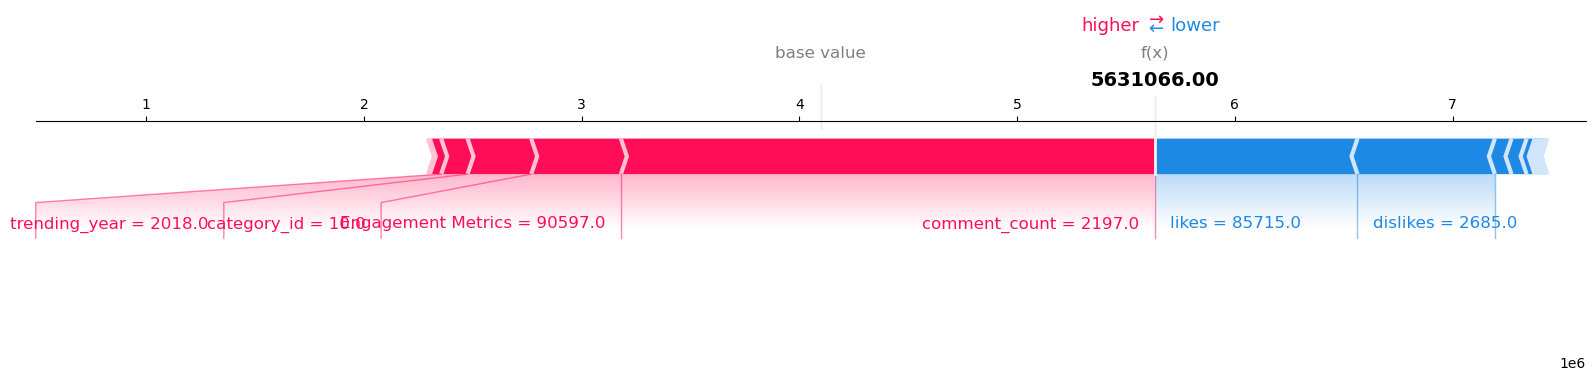

Top contributing features:
                      shap_value
feature                         
comment_count       2.451082e+06
likes              -9.323581e+05
dislikes           -6.310359e+05
Engagement Metrics  4.119252e+05
category_id         2.924393e+05
To flip from 0 to 1, consider increasing the values of the most positive SHAP-contributing features.
 - comment_count: Consider a decrease of 2451081.50 SHAP impact units to potentially achieve a prediction flip.
 - likes: Consider a increase of 932358.12 SHAP impact units to potentially achieve a prediction flip.
 - dislikes: Consider a increase of 631035.88 SHAP impact units to potentially achieve a prediction flip.
 - Engagement Metrics: Consider a decrease of 411925.19 SHAP impact units to potentially achieve a prediction flip.
 - category_id: Consider a decrease of 292439.34 SHAP impact units to potentially achieve a prediction flip.

Explanation for sample 4 (Index: 17588):
Sample details:


category_id  likes  dislikes  comment_count  Engagement Metrics  \
17588           10  46935       905           3039               50879   

              score     rank  trending_day_of_week_Monday  \
17588  22285.662368  27125.0                         True   

       trending_day_of_week_Saturday  trending_day_of_week_Sunday  ...  \
17588                          False                        False  ...   

       trending_day_of_week_Wednesday  day_of_week_Monday  \
17588                           False               False   

       day_of_week_Saturday  day_of_week_Sunday  day_of_week_Thursday  \
17588                 False               False                 False   

       day_of_week_Tuesday  day_of_week_Wednesday  trending_year  \
17588                False                  False           2018   

       trending_month  trending_day  
17588               2            12  

[1 rows x 22 columns]

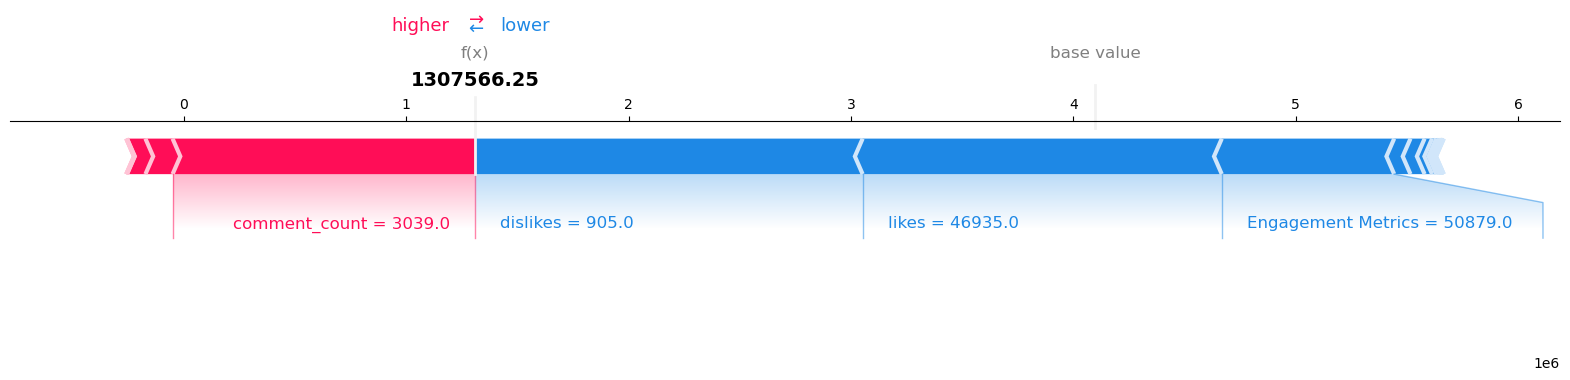

Top contributing features:
                      shap_value
feature                         
dislikes           -1.744691e+06
likes              -1.615474e+06
comment_count       1.359217e+06
Engagement Metrics -7.754625e+05
trending_month      1.220741e+05
To flip from 0 to 1, consider increasing the values of the most positive SHAP-contributing features.
 - dislikes: Consider a increase of 1744691.00 SHAP impact units to potentially achieve a prediction flip.
 - likes: Consider a increase of 1615473.50 SHAP impact units to potentially achieve a prediction flip.
 - comment_count: Consider a decrease of 1359217.00 SHAP impact units to potentially achieve a prediction flip.
 - Engagement Metrics: Consider a increase of 775462.50 SHAP impact units to potentially achieve a prediction flip.
 - trending_month: Consider a decrease of 122074.15 SHAP impact units to potentially achieve a prediction flip.

Explanation for sample 5 (Index: 76541):
Sample details:


category_id  likes  dislikes  comment_count  Engagement Metrics  \
76541            1   1882        97            239                2218   

            score     rank  trending_day_of_week_Monday  \
76541  913.322457  70178.0                        False   

       trending_day_of_week_Saturday  trending_day_of_week_Sunday  ...  \
76541                          False                        False  ...   

       trending_day_of_week_Wednesday  day_of_week_Monday  \
76541                           False               False   

       day_of_week_Saturday  day_of_week_Sunday  day_of_week_Thursday  \
76541                 False               False                 False   

       day_of_week_Tuesday  day_of_week_Wednesday  trending_year  \
76541                 True                  False           2018   

       trending_month  trending_day  
76541               5            29  

[1 rows x 22 columns]

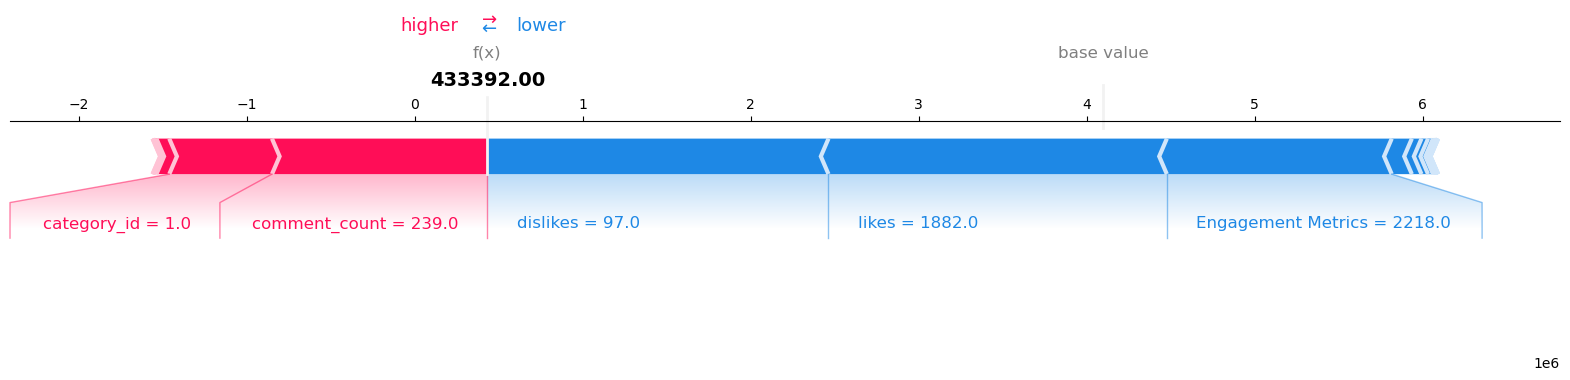

Top contributing features:
                     shap_value
feature                        
dislikes           -2030229.750
likes              -2014201.250
Engagement Metrics -1338711.000
comment_count       1282602.625
category_id          611415.875
To flip from 0 to 1, consider increasing the values of the most positive SHAP-contributing features.
 - dislikes: Consider a increase of 2030229.75 SHAP impact units to potentially achieve a prediction flip.
 - likes: Consider a increase of 2014201.25 SHAP impact units to potentially achieve a prediction flip.
 - Engagement Metrics: Consider a increase of 1338711.00 SHAP impact units to potentially achieve a prediction flip.
 - comment_count: Consider a decrease of 1282602.62 SHAP impact units to potentially achieve a prediction flip.
 - category_id: Consider a decrease of 611415.88 SHAP impact units to potentially achieve a prediction flip.


In [46]:
import shap
import numpy as np


# Randomly select 5 samples from the test set
random_samples = X_test.sample(5, random_state=42)

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(random_samples)

# Generate and analyze SHAP values for random samples
for i, sample_index in enumerate(random_samples.index):
    print(f"\nExplanation for sample {i+1} (Index: {sample_index}):")
    
    # Display all columns' information for this prediction
    print("Sample details:")
    display(random_samples.loc[[sample_index]])  # Show the full row details
    
    # Calculate and display the SHAP force plot for visualization
    shap.initjs()
    shap.force_plot(explainer.expected_value, shap_values[i], random_samples.iloc[i], matplotlib=True)
    
    # Retrieve SHAP values for the sample and sort by absolute importance
    sample_shap_values = shap_values[i]
    feature_importances = pd.DataFrame({
        'feature': random_samples.columns,
        'shap_value': sample_shap_values
    }).set_index('feature').sort_values(by='shap_value', key=abs, ascending=False)
    
    # Display the top features that influenced the prediction
    print("Top contributing features:")
    print(feature_importances.head())

    # Suggest changes for flipping the prediction
    current_prediction = model.predict(random_samples.iloc[[i]])[0]
    if current_prediction == 1:
        print(f"To flip from 1 to 0, consider reducing the values of the most positive SHAP-contributing features.")
    else:
        print(f"To flip from 0 to 1, consider increasing the values of the most positive SHAP-contributing features.")

    # Suggest how to change the feature values
    for feature, shap_value in feature_importances.head().itertuples():
        direction = "increase" if shap_value < 0 else "decrease"
        print(f" - {feature}: Consider a {direction} of {abs(shap_value):.2f} SHAP impact units to potentially achieve a prediction flip.")

# Model Deployment, Data Drift and Concept Drift, and Model Monitoring

## Serializing and Saving the Model with Pickle

In [47]:
import pickle

model_filename = 'XGBoost_model.pkl'

# Save the trained model to a file
with open(model_filename, 'wb') as file:
    pickle.dump(model, file)

print(f"Model saved to {model_filename}")


Model saved to XGBoost_model.pkl


In [48]:
# Load the model from the file
with open(model_filename, 'rb') as file:
    loaded_model = pickle.load(file)

In [49]:
predictions = loaded_model.predict(X_test)

## Save and Load the Data

In [50]:
data_filename = 'data.pkl'

# Save datasets to a file
with open(data_filename, 'wb') as file:
    pickle.dump({'X_train': X_train, 'X_test': X_test, 'y_train': y_train, 'y_test': y_test}, file)

print(f"Datasets saved to {data_filename}")


Datasets saved to data.pkl


In [51]:
# Load datasets from the file
with open(data_filename, 'rb') as file:
    data = pickle.load(file)

# Extract datasets
X_train = data['X_train']
X_test = data['X_test']
y_train = data['y_train']
y_test = data['y_test']

## Obtain the Environment Dependencies 

In [52]:
import platform
import sys
import pkg_resources

# Collect OS and Python version information
print("OS:", platform.system(), platform.version())
print(f"Operating System: {platform.system()} {platform.release()}")
print("Python Version:", sys.version)

OS: Darwin Darwin Kernel Version 23.3.0: Wed Dec 20 21:28:58 PST 2023; root:xnu-10002.81.5~7/RELEASE_X86_64
Operating System: Darwin 23.3.0
Python Version: 3.11.5 (main, Sep 11 2023, 08:19:27) [Clang 14.0.6 ]


## Identify the Packages Used and Version

In [53]:
import importlib
import pkg_resources

# List of packages identified from notebook
packages = [
    "matplotlib.pyplot", "nltk", "numpy", "os", "palettable.colorbrewer.qualitative",
    "pandas", "re", "seaborn", "shap", "sklearn.decomposition",
    "sklearn.feature_extraction.text", "sklearn.metrics", "sklearn.model_selection",
    "sklearn.preprocessing", "textblob", "wordcloud", "xgboost", "zipfile"
]

# Function to get package version
def get_package_version(package):
    try:
        # Handle "matplotlib.pyplot" style imports
        if '.' in package:
            package = package.split('.')[0]
        # Try pkg_resources first
        version = pkg_resources.get_distribution(package).version
    except pkg_resources.DistributionNotFound:
        # If not found, try importlib
        try:
            module = importlib.import_module(package)
            version = getattr(module, '__version__', 'Version not found')
        except ImportError:
            version = 'Not installed'
    return version

# Collect versions
package_versions = {pkg: get_package_version(pkg) for pkg in packages}

# Display package versions
print("Package Versions:")
for pkg, version in package_versions.items():
    print(f"{pkg}: {version}")

Package Versions:
matplotlib.pyplot: 3.7.2
nltk: 3.8.1
numpy: 1.24.3
os: Version not found
palettable.colorbrewer.qualitative: 3.3.3
pandas: 2.0.3
re: 2.2.1
seaborn: 0.12.2
shap: 0.46.0
sklearn.decomposition: 1.3.0
sklearn.feature_extraction.text: 1.3.0
sklearn.metrics: 1.3.0
sklearn.model_selection: 1.3.0
sklearn.preprocessing: 1.3.0
textblob: 0.18.0.post0
wordcloud: 1.9.3
xgboost: 2.0.3
zipfile: Version not found
